<a href="https://colab.research.google.com/github/FuturisticLover123/learning/blob/main/DataAnalys/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ЛБ03. Влияние шкалирования данных
- 05-март-2025
- 3 курс, 5(в) группа

In [ ]:
# %pip install scikit-learn

In [ ]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 1. Ухудшение точности на деревьях

Генерация данных

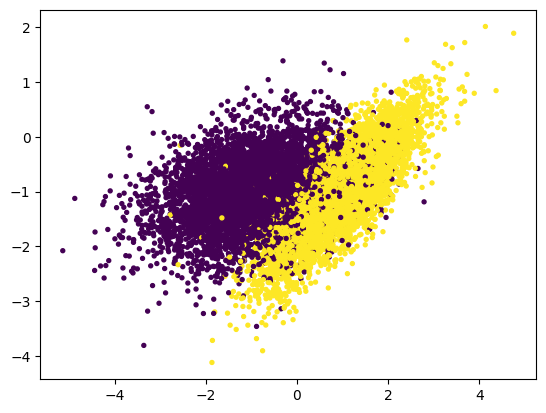

In [ ]:
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                          n_redundant=0, n_classes=2, n_clusters_per_class=1,
                          random_state=777
                          )
plt.scatter(X[:,0], X[:,1],c=y,s=8)

При шкалировании точность регресси упадет (раскомментировать строки кода и сравнить)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.855

In [ ]:
roc_auc_score(tree.predict(X_test), y_test)

np.float64(0.867160140411086)

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.067\ngini = 0.5\nsamples = 8000\nvalue = [3996.0, 4004.0]'),
 Text(0.25, 0.5, 'x[1] <= -1.893\ngini = 0.234\nsamples = 3939\nvalue = [3406, 533]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.499\nsamples = 632\nvalue = [299, 333]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.114\nsamples = 3307\nvalue = [3107, 200]'),
 Text(0.75, 0.5, 'x[0] <= 0.61\ngini = 0.248\nsamples = 4061\nvalue = [590, 3471]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.438\nsamples = 1087\nvalue = [352, 735]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.147\nsamples = 2974\nvalue = [238.0, 2736.0]')]

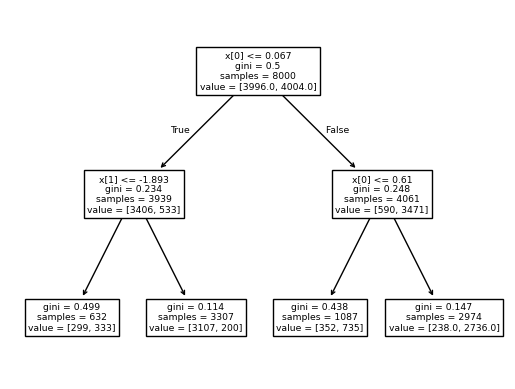

In [ ]:
plot_tree(tree)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=777)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.867125

In [ ]:
roc_auc_score(tree.predict(X_test), y_test)

np.float64(0.8715013119774023)

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.514\ngini = 0.5\nsamples = 2000\nvalue = [982, 1018]'),
 Text(0.25, 0.5, 'x[1] <= 0.297\ngini = 0.238\nsamples = 978\nvalue = [843, 135]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.461\nsamples = 111\nvalue = [40, 71]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.137\nsamples = 867\nvalue = [803, 64]'),
 Text(0.75, 0.5, 'x[0] <= 0.575\ngini = 0.235\nsamples = 1022\nvalue = [139, 883]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.426\nsamples = 260\nvalue = [80, 180]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.143\nsamples = 762\nvalue = [59.0, 703.0]')]

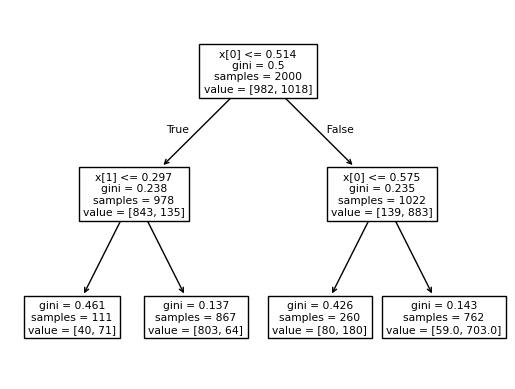

In [ ]:
plot_tree(tree)

## 2. Логистическая регрессия

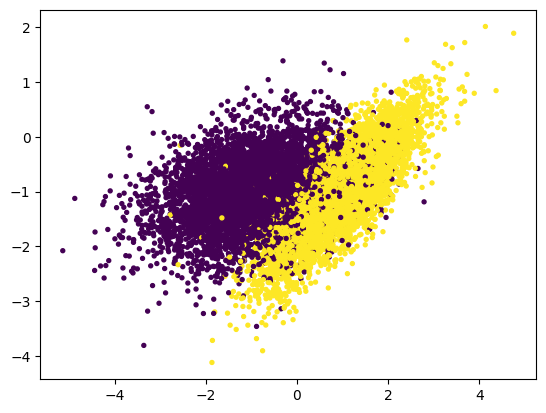

In [ ]:
X,y = make_classification(n_samples=10000, n_features=2, n_informative=2,
                          n_redundant=0, n_classes=2, n_clusters_per_class=1,
                          random_state=777
                          )
plt.scatter(X[:,0], X[:,1],c=y,s=8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=777)

In [ ]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.91675

In [ ]:
roc_auc_score(reg.predict(X_test), y_test)

np.float64(0.918243611967129)

С применением шкалирования (тоже падение `score`):

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=777)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.909375

In [ ]:
roc_auc_score(reg.predict(X_test), y_test)

np.float64(0.9133123152709359)